# Data project 2024(public seats on Melbourne)
Haoyue Sun
z5526241


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopandas as gp
import shapely
import fiona
import geopy.distance
import seaborn as sns


In [4]:
import os
import requests
import geopandas as gpd
from io import BytesIO


url = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/cafes-and-restaurants-with-seating-capacity/exports/geojson?lang=en&timezone=Australia%2FSydney"

response = requests.get(url)

if response.status_code == 200:
    geojson_data = BytesIO(response.content)
    gdf = gpd.read_file(geojson_data)
    print("GeoJSON data successfully loaded!")

    os.makedirs('seats_dataset', exist_ok=True)
    output_file_path = os.path.join('seats_dataset', 'cafes_and_restaurants.geojson')
    gdf.to_file(output_file_path, driver='GeoJSON')
    
    print(f"GeoJSON data successfully saved to {output_file_path}")
else:
    print(f"Failed to retrieve data. HTTP Status Code: {response.status_code}")

print('done')

GeoJSON data successfully loaded!
GeoJSON data successfully saved to seats_dataset\cafes_and_restaurants.geojson
done


In [5]:
%matplotlib inline

In [6]:
plt.rcParams["figure.figsize"] = (10, 5)


In [7]:
saved_style_state = matplotlib.rcParams.copy()  


In [8]:
if os.path.isfile("seats_data_set_0.csv"):
    filepath = "seats_data_set_0.csv"
    print("loading from file")
else:
    filepath = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/cafes-and-restaurants-with-seating-capacity/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C"
    print("loading from the internet")

seats_data = pd.read_csv(filepath)
print("done")


loading from the internet
done


This is the data table

In [13]:
seats_data.head()


,Census year,Block ID,Property ID,Base property ID,Building address,CLUE small area,Trading name,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,Seating type,Number of seats,Longitude,Latitude,location
0,2017,6,578324,573333,2 Swanston Street MELBOURNE 3000,Melbourne (CBD),Transport Hotel,"Tenancy 29, Ground , 2 Swanston Street MELBOUR...",4520,"Pubs, Taverns and Bars",Seats - Indoor,230,144.969942,-37.817778,"-37.817777826050005, 144.96994164279243"
1,2017,6,578324,573333,2 Swanston Street MELBOURNE 3000,Melbourne (CBD),Transport Hotel,"Tenancy 29, Ground , 2 Swanston Street MELBOUR...",4520,"Pubs, Taverns and Bars",Seats - Outdoor,120,144.969942,-37.817778,"-37.817777826050005, 144.96994164279243"
2,2017,11,103957,103957,517-537 Flinders Lane MELBOURNE 3000,Melbourne (CBD),Altius Coffee Brewers,"Shop , Ground , 517 Flinders Lane MELBOURNE 3000",4512,Takeaway Food Services,Seats - Outdoor,4,144.956486,-37.819875,"-37.819875445799994, 144.95648638781466"
3,2017,11,103957,103957,517-537 Flinders Lane MELBOURNE 3000,Melbourne (CBD),Five & Dime Bagel,16 Flinders Lane MELBOURNE 3000,1174,Bakery Product Manufacturing (Non-factory based),Seats - Indoor,14,144.956486,-37.819875,"-37.819875445799994, 144.95648638781466"
4,2017,11,103985,103985,562-564 Flinders Street MELBOURNE 3000,Melbourne (CBD),YHA Melbourne Central,562-564 Flinders Street MELBOURNE 3000,4400,Accommodation,Seats - Indoor,43,144.955635,-37.820595,"-37.82059511593975, 144.9556348088"


This is the change in the total number of restaurant seats from 2002-2022.

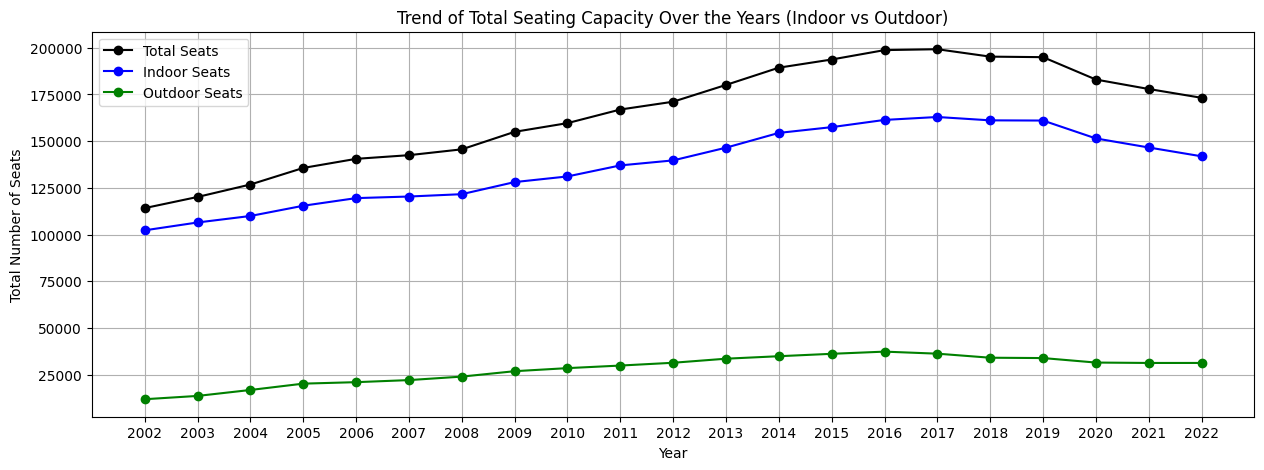

In [22]:
# Calculate the total number of seats per year
total_seating_trend = seats_data.groupby('Census year')['Number of seats'].sum()

# Calculate the total number of indoor and outdoor seats per year
total_seating_trend_indoor = seats_data[seats_data['Seating type'] == 'Seats - Indoor'].groupby('Census year')['Number of seats'].sum()
total_seating_trend_outdoor = seats_data[seats_data['Seating type'] == 'Seats - Outdoor'].groupby('Census year')['Number of seats'].sum()

# Plot the total seating capacity over the years, with indoor and outdoor seats highlighted
plt.figure(figsize=(15, 5))
plt.plot(total_seating_trend.index, total_seating_trend.values, marker='o', linestyle='-', color='black', label='Total Seats')
plt.plot(total_seating_trend_indoor.index, total_seating_trend_indoor.values, marker='o', linestyle='-', color='blue', label='Indoor Seats')
plt.plot(total_seating_trend_outdoor.index, total_seating_trend_outdoor.values, marker='o', linestyle='-', color='green', label='Outdoor Seats')
plt.title('Trend of Total Seating Capacity Over the Years (Indoor vs Outdoor)')
plt.xlabel('Year')
plt.ylabel('Total Number of Seats')
plt.grid(True)
plt.legend()
plt.xticks(total_seating_trend.index.astype(int))
plt.show()


Top10 Median and average seat capacity by industry

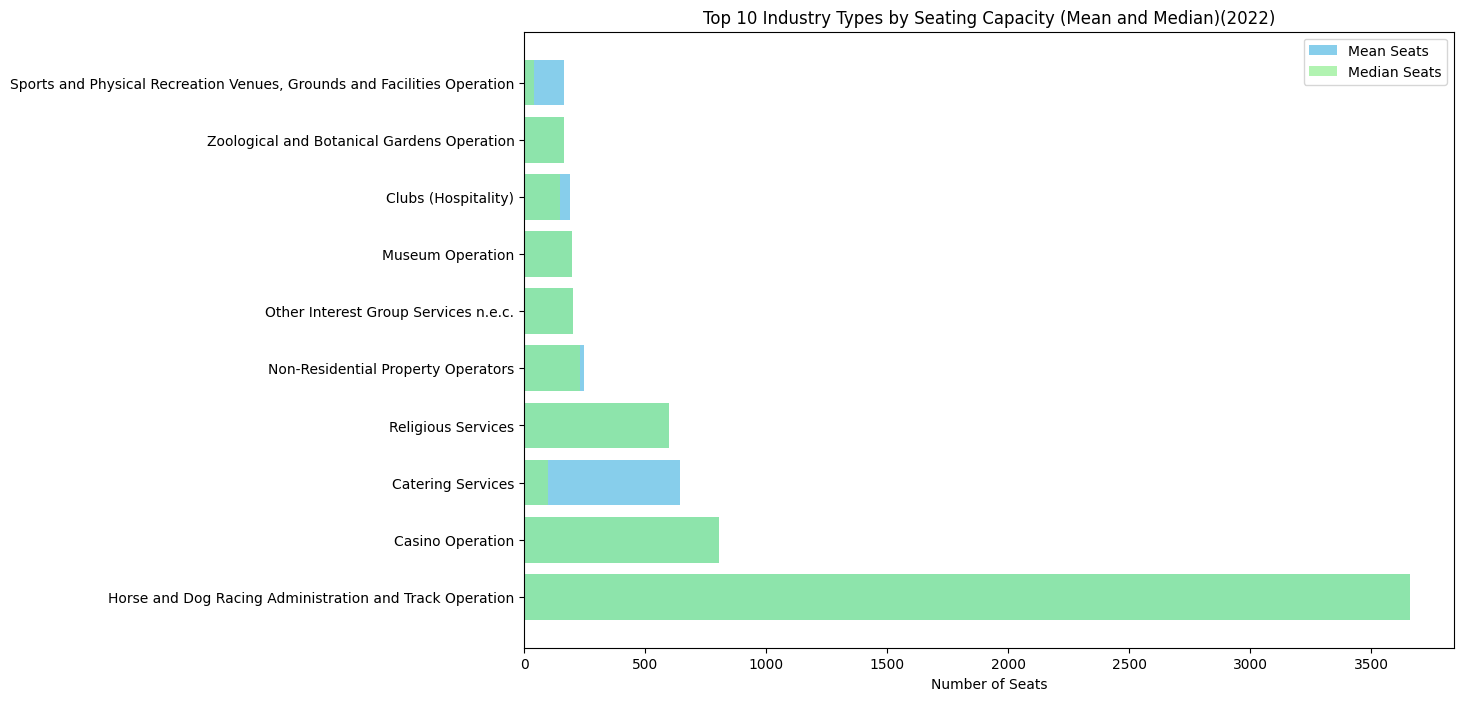

In [19]:
seats_data_2022 = seats_data[seats_data['Census year'] == 2022]\

industry_seating_analysis = seats_data_2022.groupby('Industry (ANZSIC4) description')['Number of seats'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
# Selecting the top 10 industries with the highest mean seating capacity for better visualization
top_industries = industry_seating_analysis.head(10)

# Creating a bar plot for the mean and median seating capacity
plt.figure(figsize=(12, 8))

# Mean seating capacity bar
plt.barh(top_industries.index, top_industries['mean'], color='skyblue', label='Mean Seats')

# Median seating capacity bar (overlayed)
plt.barh(top_industries.index, top_industries['median'], color='lightgreen', label='Median Seats', alpha=0.7)

plt.xlabel('Number of Seats')
plt.title('Top 10 Industry Types by Seating Capacity (Mean and Median)(2022)')
plt.legend()

# Display the plot
plt.show()


The top 10 industries (2022)

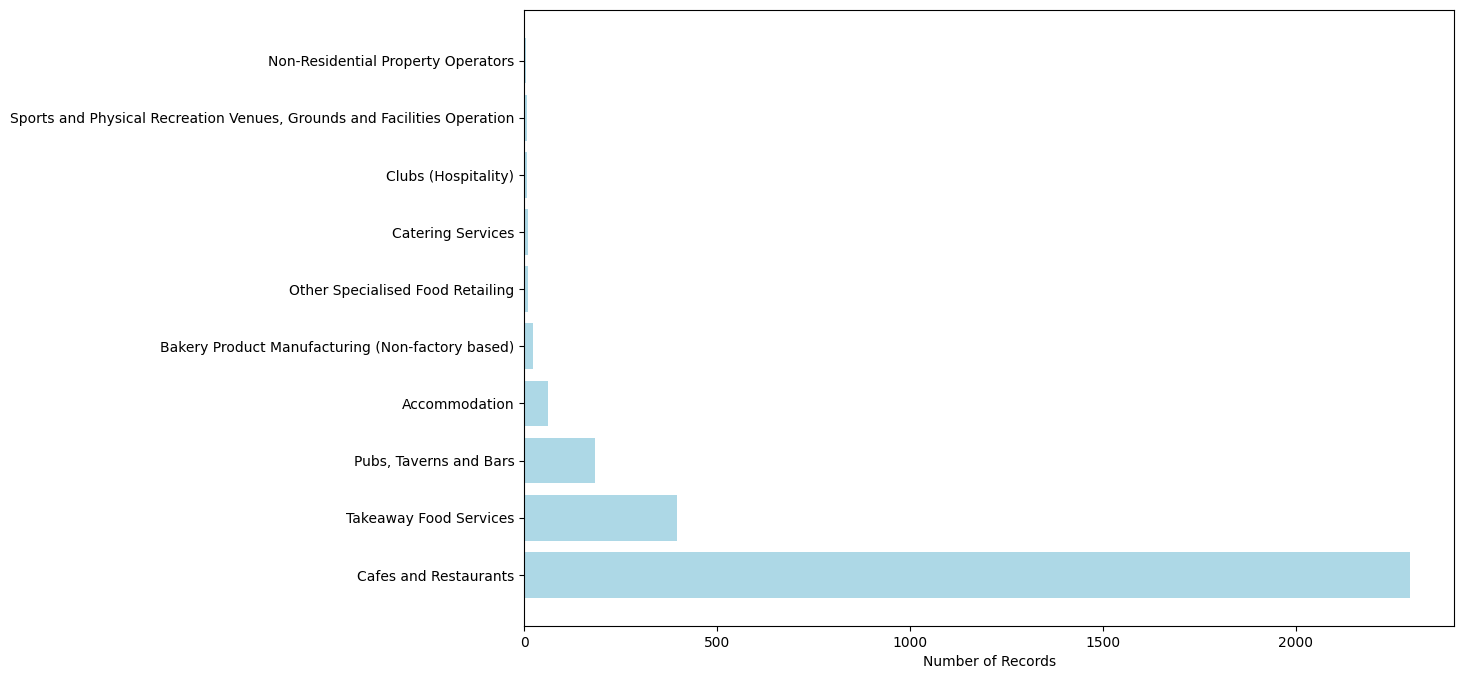

In [17]:
seats_data_2022 = seats_data[seats_data['Census year'] == 2022]

industry_seating_analysis = seats_data_2022.groupby('Industry (ANZSIC4) description')['Number of seats'].agg(['mean', 'median', 'count']).sort_values(by='count', ascending=False)

top_10_industries_by_count = industry_seating_analysis.head(10)

plt.figure(figsize=(12, 8))


plt.barh(top_10_industries_by_count.index, top_10_industries_by_count['count'], color='lightblue')


plt.xlabel('Number of Records')

plt.show()

Number of seats per region in 2002 and number of seats in 2022

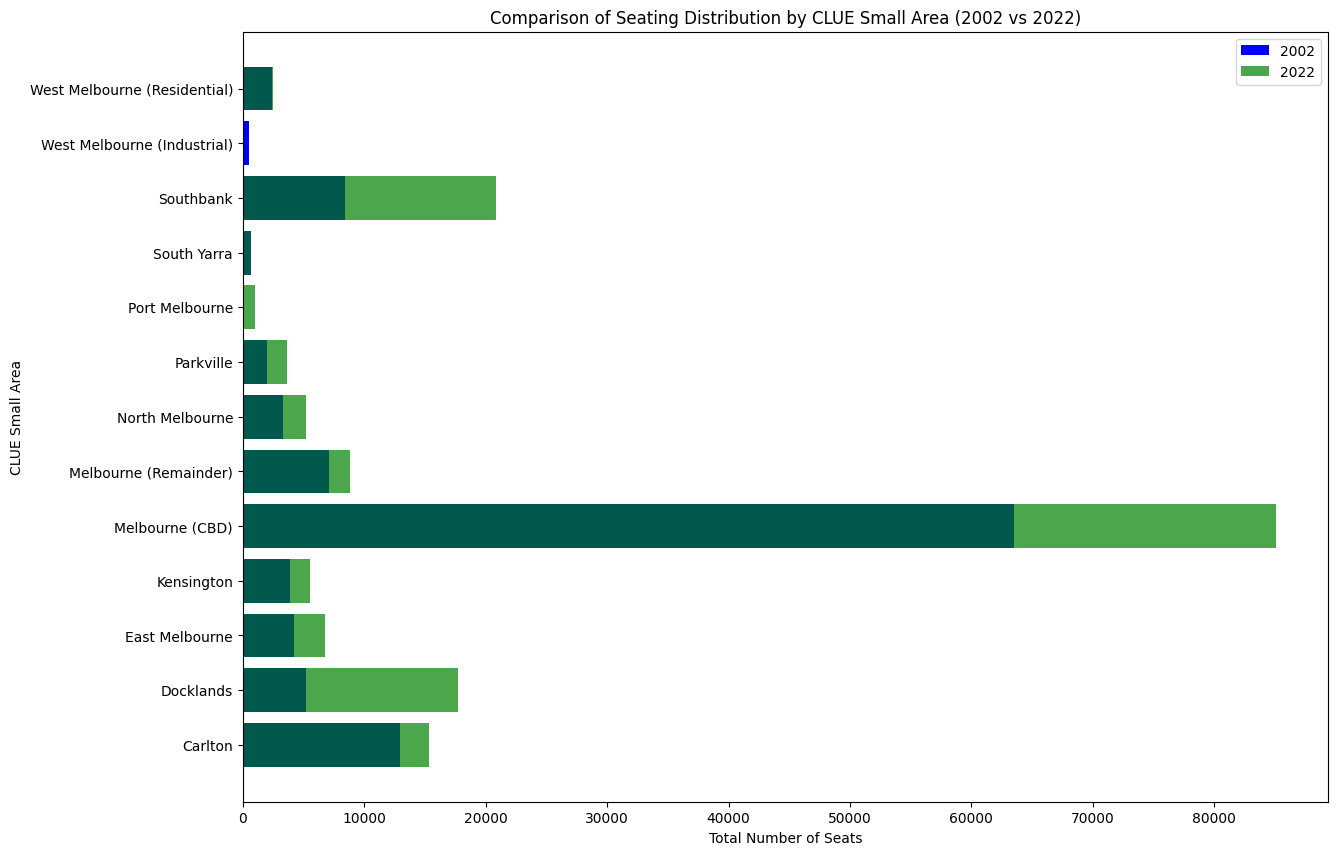

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df_2002 = seats_data[seats_data['Census year'] == 2002]
df_2022 = seats_data[seats_data['Census year'] == 2022]

seats_2002 = df_2002.groupby('CLUE small area')['Number of seats'].sum().reset_index()
seats_2022 = df_2022.groupby('CLUE small area')['Number of seats'].sum().reset_index()

seats_comparison = pd.merge(seats_2002, seats_2022, on='CLUE small area', how='outer', suffixes=('_2002', '_2022')).fillna(0)

plt.figure(figsize=(14, 10))

plt.barh(seats_comparison['CLUE small area'], seats_comparison['Number of seats_2002'], color='blue', label='2002')


plt.barh(seats_comparison['CLUE small area'], seats_comparison['Number of seats_2022'], color='green', label='2022', alpha=0.7)

plt.xlabel('Total Number of Seats')
plt.ylabel('CLUE Small Area')
plt.title('Comparison of Seating Distribution by CLUE Small Area (2002 vs 2022)')
plt.legend()

plt.show()


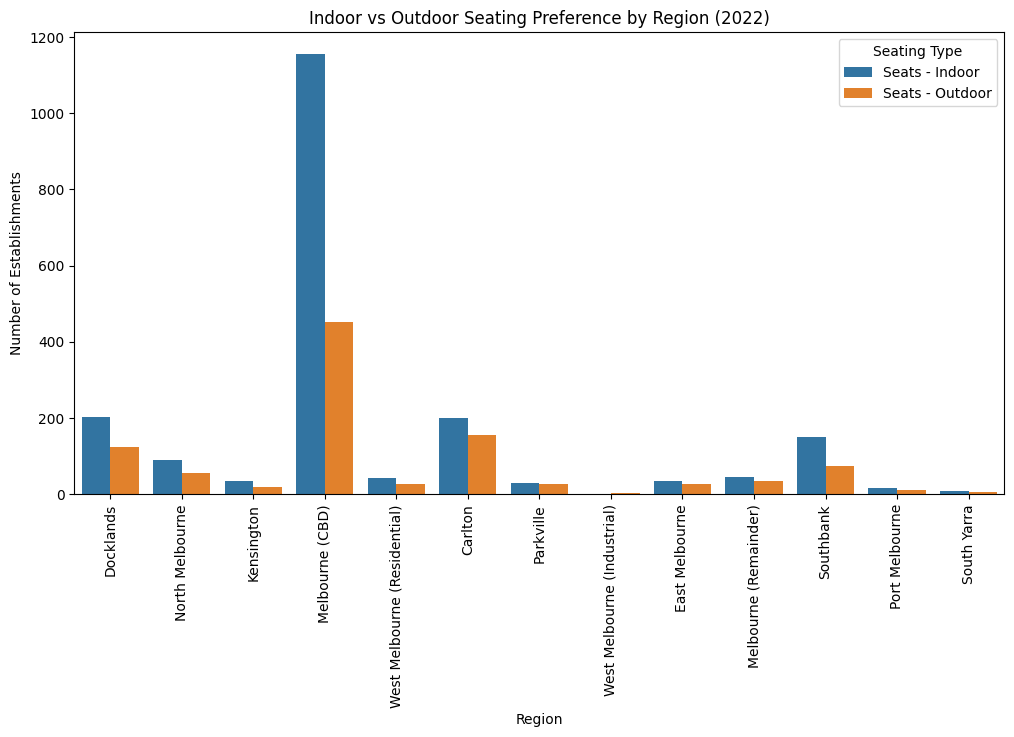

In [10]:

# Filter the data for the year 2022
seats_data_2022 = seats_data[seats_data['Census year'] == 2022]

# Create the bar plot for indoor vs outdoor seating by region
plt.figure(figsize=(12, 6))
sns.countplot(data=seats_data_2022, x='CLUE small area', hue='Seating type')
plt.xticks(rotation=90)
plt.title('Indoor vs Outdoor Seating Preference by Region (2022)')
plt.ylabel('Number of Establishments')
plt.xlabel('Region')
plt.legend(title='Seating Type')
plt.show()


The proportion of outdoor and indoor in the four industries.

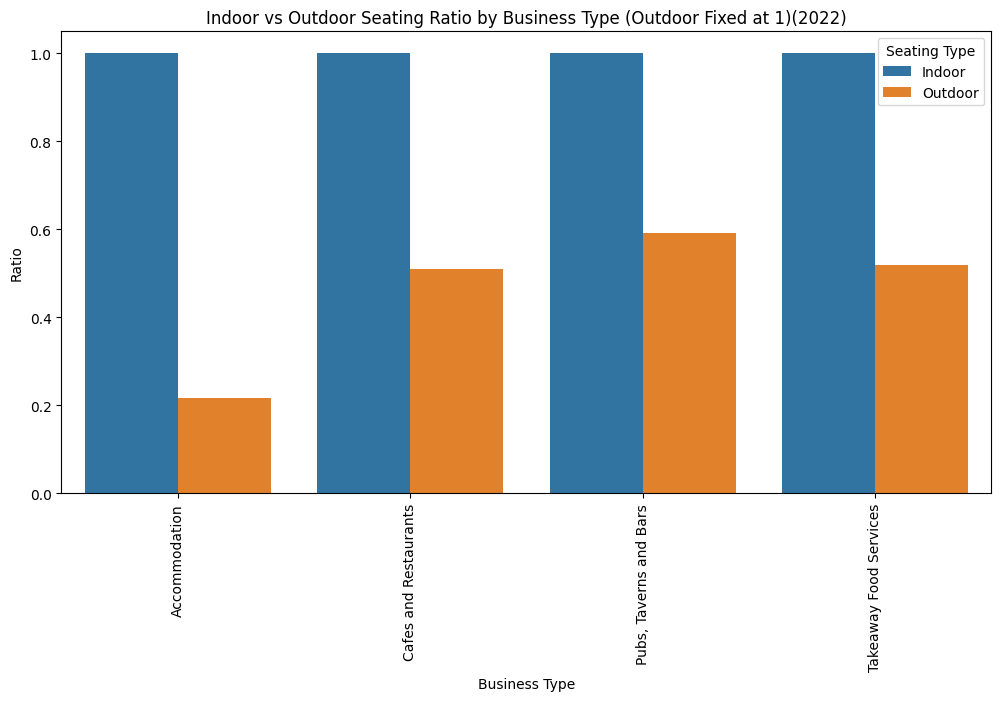

In [16]:
seats_data_2022 = seats_data[seats_data['Census year'] == 2022]
selected_industries = [
    'Cafes and Restaurants',
    'Takeaway Food Services',
    'Pubs, Taverns and Bars',
    'Accommodation'
]

filtered_df = seats_data_2022[seats_data_2022['Industry (ANZSIC4) description'].isin(selected_industries)]
seating_counts = filtered_df.groupby(['Industry (ANZSIC4) description', 'Seating type']).size().unstack(fill_value=0)

seating_counts['Outdoor'] = seating_counts['Seats - Outdoor'] / seating_counts['Seats - Indoor']
seating_counts['Indoor'] = 1

seating_ratios = seating_counts[['Indoor', 'Outdoor']].reset_index()

seating_ratios_melted = seating_ratios.melt(id_vars='Industry (ANZSIC4) description', 
                                            value_vars=['Indoor', 'Outdoor'], 
                                            var_name='Seating Type', 
                                            value_name='Ratio')

plt.figure(figsize=(12, 6))

sns.barplot(data=seating_ratios_melted, x='Industry (ANZSIC4) description', y='Ratio', hue='Seating Type')

plt.xticks(rotation=90)
plt.title('Indoor vs Outdoor Seating Ratio by Business Type (Outdoor Fixed at 1)(2022)')
plt.ylabel('Ratio')
plt.xlabel('Business Type')
plt.legend(title='Seating Type')
plt.show()





Seating capacity for different industries

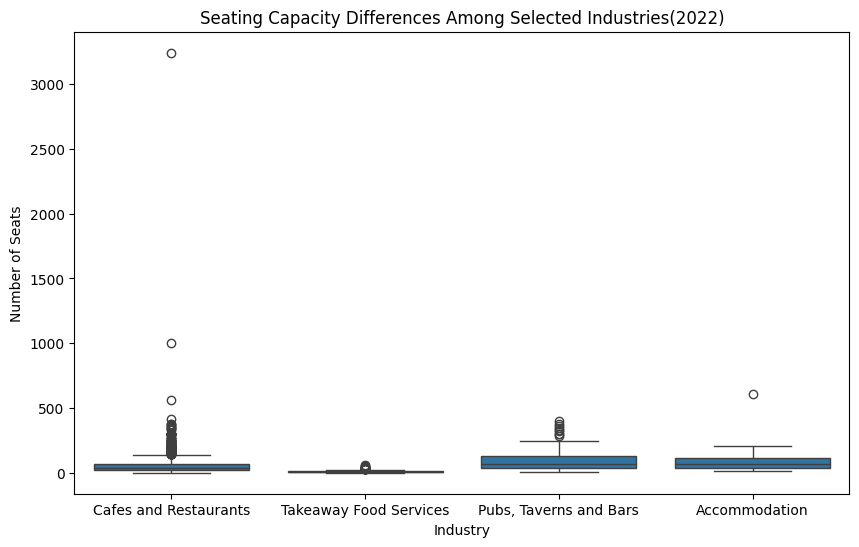

In [15]:
seats_data_2022 = seats_data[seats_data['Census year'] == 2022]

filtered_df = seats_data_2022[seats_data_2022['Industry (ANZSIC4) description'].isin([
    'Cafes and Restaurants',
    'Takeaway Food Services',
    'Pubs, Taverns and Bars',
    'Accommodation'
])]

# Create a boxplot to visualize the seating capacity differences among these industries
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='Industry (ANZSIC4) description', y='Number of seats')
plt.title('Seating Capacity Differences Among Selected Industries(2022)')
plt.ylabel('Number of Seats')
plt.xlabel('Industry')
plt.show()

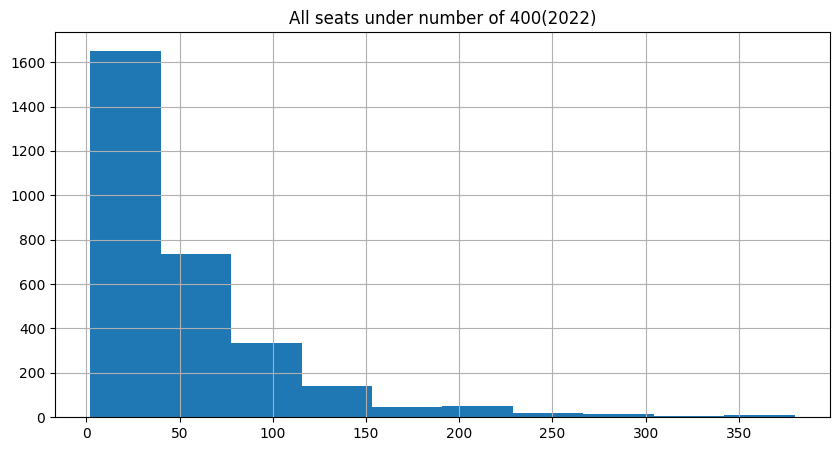

In [24]:
upper_bound = 400
seats_data_2022['Number of seats'][seats_data_2022['Number of seats'] < upper_bound].hist()
plt.title(f"All seats under number of {upper_bound}(2022)")
plt.show()


Map
Shows the density of seats in Melbourne map.

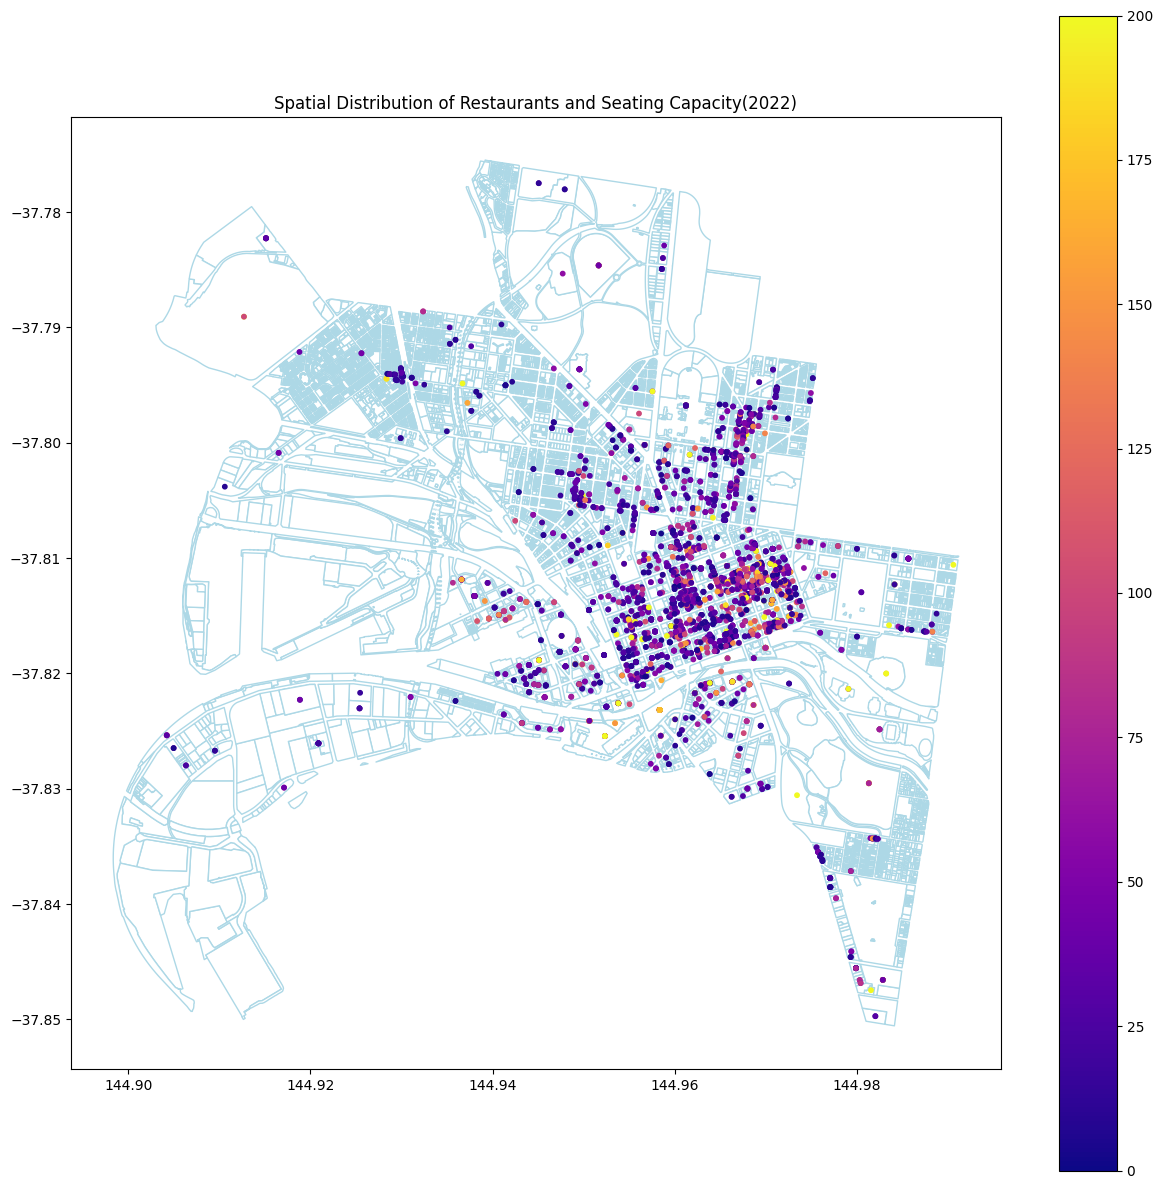

In [20]:
from shapely.geometry import Point

mel_prop = gpd.read_file("property-boundaries/property-boundaries.shp")
mel_muni = gpd.read_file("municipal-boundary/municipal-boundary.shp")
city_map = gpd.read_file('seats_dataset/cafes_and_restaurants.geojson')


geometry = [Point(xy) for xy in zip(seats_data_2022['Longitude'], seats_data_2022['Latitude'])]
geo_df = gpd.GeoDataFrame(seats_data_2022, geometry=geometry)


geo_df.crs = city_map.crs

fig, ax = plt.subplots(figsize=(15, 15))
mel_prop.plot(ax=ax, color='white', edgecolor='lightblue')
geo_df.plot(ax=ax, column='Number of seats', cmap='plasma', markersize=10, legend=True, vmin=0, vmax=200)


plt.title('Spatial Distribution of Restaurants and Seating Capacity(2022)')


plt.show()
